In [55]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
import numpy as np

In [2]:
deseq_results_table = pd.read_csv("deseq_results.txt", sep="\t", header=None, names=["msex", "cell_population", "brain_region", "up", "down"])

In [12]:
deseq_results_table["max_changes"] = deseq_results_table[["up", "down"]].max(axis=1)

In [15]:
deseq_results_table_sorted = deseq_results_table.sort_values(by="max_changes", ascending=False)

In [16]:
deseq_results_table_sorted

,msex,cell_population,brain_region,up,down,max_changes
20,F,Oligodendrocyte,Hippocampus,8,1962,1962
4,Both,Oligodendrocyte,dlPFC,1029,0,1029
1,Both,All,dlPFC,342,0,342
13,Both,Non-neuron,dlPFC,316,1,316
29,F,Non-neuron,Hippocampus,1,132,132
43,M,Non-neuron,dlPFC,90,4,90
28,F,Non-neuron,dlPFC,88,12,88
34,M,Oligodendrocyte,dlPFC,72,4,72
17,F,All,Hippocampus,0,61,61
12,Both,Non-neuron,Both,53,5,53


(-2000, 2000)

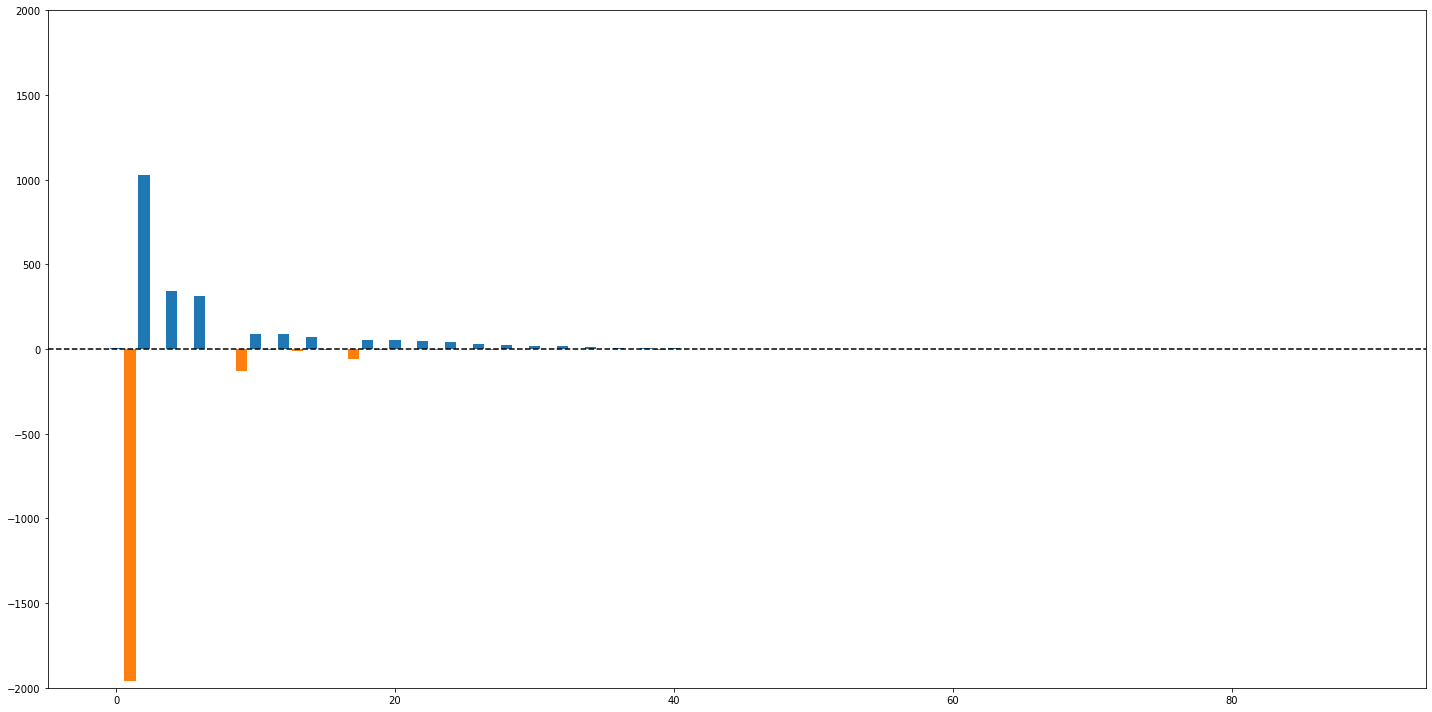

In [17]:
plt.figure(figsize=(20,10))
plt.bar(range(0,2*deseq_results_table_sorted.shape[0],2),deseq_results_table_sorted["up"])
plt.bar([1+val for val in range(0,2*deseq_results_table_sorted.shape[0],2)], -deseq_results_table_sorted["down"])
plt.axhline(linestyle='dashed', color='k')
plt.ylim([-2000, 2000])

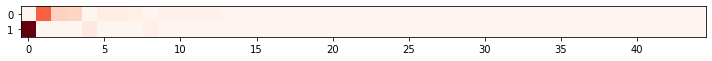

In [33]:
plt.figure(figsize=(10,20))
plt.imshow(deseq_results_table_sorted[["up","down"]].values.T, aspect="equal", cmap="Reds")
plt.savefig("deseq_results_table.svg")

In [70]:
brain_region_colors = {"Hippocampus": np.array([0,0,89]), "dlPFC": np.array([111,0,0]), "Both": np.array([56,0,45]) }
cell_type_colors = {"Neuron": np.array([255,153,102]), "Microglia": np.array([0,102,153]), "Oligodendrocyte": np.array([0,153,102]), "Non-neuron": np.array([0,128,128]), "All": np.array([0,0,0])}
msex_colors = {"F": np.array([64,0,75]), "M": np.array([0,68,27]), "Both": np.array([32,34,51])}

In [71]:
deseq_results_table_sorted["brain_region_color"] = deseq_results_table_sorted.apply(lambda row: brain_region_colors[row.brain_region], axis=1)

deseq_results_table_sorted["cell_type_color"] = deseq_results_table_sorted.apply(lambda row: cell_type_colors[row.cell_population], axis=1)

deseq_results_table_sorted["msex_color"] = deseq_results_table_sorted.apply(lambda row: msex_colors[row.msex], axis=1)

In [72]:
deseq_results_table_sorted.shape

(45, 9)

In [81]:
label_colors = []
for val in deseq_results_table_sorted[["brain_region_color", "cell_type_color", "msex_color"]].values:
    label_colors.append([val1 for val1 in val])

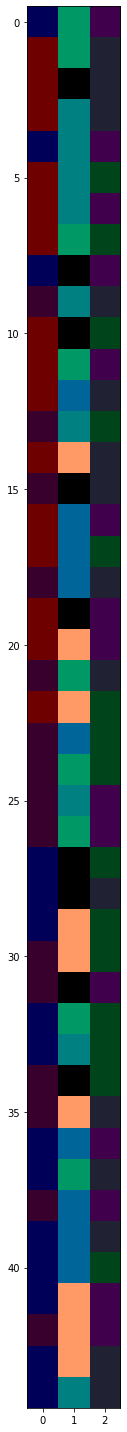

In [90]:
plt.figure(figsize=(10,20))
plt.imshow(np.array(label_colors))
plt.savefig("deseq_results_table_labels.svg")